# Assignment 1 (shortened)

This notebook contains three exercises from the exercise sets we covered prior to moving the teaching online. It will count as one of the two assignments you need to submit to qualify for the exam. **The deadline** for handing in this assignment is **April 3.** You hand in by pushing your solutions to your folder in the exercise repo.

## Problems from exercise set 2
> **Ex. 2.1.1**: The performance of a random forest classifier is highly sensitive to hyper parameters. Therefore, you should be intimately familiar with what the most important ones do. For each point below, explain what the hyper parameter pertaining to `sklearn.ensemble.RandomForestClassifier` controls, and how setting it either too low or too high (or True/False) might hurt model performance:
1. `n_estimators`
2. `max_depth`
3. `max_features`
4. `bootstrap`

#### Solution to Ex. 2.1.1:

The sklearn.ensemble.RandomForestClassifier is an ensemble module that applies the averaging algorithm of random forest based on randomized decision trees. Here, each tree in the ensemble is built based on a sample drawn from the training data set with replacement such that it is an bootstrap sampling algorithm. Furthermore, the splitting of the decision trees is based on a random subset of the features of the data (an option allows the whole set of features to be applied in sk.learn).

Overall, the ensemble approach/averaging method estimates several estimators independtly for the purpose of
averaging their predictions in the end. This can reduce the variance significantly, however, at the cost of introducing
some bias on the training data set. Furhtermore, the randomness introduced in random forest is good at handling the potential overfitting of individual decision trees.

Another consideration that we have to take into account is the hyperparamters (which we sometimes take as given or train in nested CV).
We comment on the following hyper-parameters which we have to set as inputs wihtin the RandomForestClassifier:

1. `n_estimators` : integer, optional (default=100) - The number of trees in the forest (we specify a number as it is random forrest - corresponds to how many times we bootstrap). As random forest is an averaging method, then the larger the forest, the better. However, the larger the forest, the more computational power is needed, and the longer it will take to compute. Furthermore, we observe that results will stop getting significantly better after we've reached a critical number of trees (thus, some sort of convergence in terms of performance (accuracy or MSE).

2. `max_depth`: integer or None, optional (default=None) - The maximum depth of the tree. It is a general issue for decision trees that too deep trees result in very low bias (we fit the data too good) at the expense of higher variance on "new" data - such a tree does not perform well. In contrast to ADABOOST, where we sequentially train "weak models", then the random forest assume that the model algorithm is "fully developed" and such a hyperparameter is important in terms of bias/variance tradeoff for the individual tree (even though the final prediction is an average over multiple tree estiamtes).

3. `max_features`: In accordance with the described bootstrap approach underneath, then the max_features is the number of features to consider when looking for the best split (thus, we do not apply all of them) as there is different options on how to select the features to split from. However, Default is “auto” where then "max_features=sqr" (as this is considered the optimal hyperparamter value for classification as stated in the scikit-learn.org module description) and "None" yields max_features=n_features (optimal for regression tasks). However, the best parameter values should always be cross-validated. As stated in the intro to this question, then the introduction of the randomness in terms of applying a subsample of the features for tree building iis good at handling the potential overfitting.

4. `bootstrap`: bootstrapboolean, optional (default=True) - Whether bootstrap samples are used when building trees. If False, the whole datset is used to build each tree. As explained above, then the randomness introduced here is a good way to avoid the potential overfitting.

> **Ex. 2.1.2**: For `n_estimators > 1`how should one set the hyper-parameters `max_features` and `bootstrap` so that all the trees in the ensemble end up identical?

#### Solution to Ex. 2.1.1:

For n_estimators > 1 (thus, a random forrest as we apply more than one decision tree), then in order to let the trees in the ensemble end up being identical, then one should apply the following:

1. `max_features` = None . Here, all the features  are taken into account such that w do not apply a random subset of the features for the splitting of the tree(s). Thus, given the same dataset were applied over and over again, then we would build the same tree over and over again. (The first source of randomness in the random trees method is here removed) 
2. `bootstrap` = False . Here, we do not apply the bootstrap method for selecting subsamples of the the training data (with replacement) - thus, the same (whole) dataset is applied for each tree when we build a forest. Thus, here the second source of randomness in the ensemble method of random forest is removed.

## Problems from exercise set 3

> **Ex. 3.1.2**: Reproduce the figure from the slides that compares PCA, LDA, t-SNE and UMAP as applied to the digits dataset.
1. Do it for the digits dataset (same as in slides)
2. Do it also for the wine dataset. What problems do you observe if you don't standardize the wine dataset? Why is this not a problem with the digits data?
3. Comment on the differences you observe as well as the applicability (and necessity thereof) of different methods for different data.
>
> *Hint: You can use [this class](https://github.com/ulfaslak/ulf_pytools/blob/7f4f1eb7e2d721851c8dacb20904478b19090f2a/ulf.py#L451) for making coloring easier. It lets you create a function that takes a category as input and returns an associated color. Read the docstring for usage example.*

1. Do it for the digits dataset (same as in slides)

### Import relevant modules and load data

In [34]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from umap import UMAP 
from sklearn.preprocessing import StandardScaler

# Get wine data
data_wine = load_wine()
X_wine = data_wine['data']
y_wine = data_wine['target']

# Get digits data
data_digits = load_digits()
X_digits = data_digits['data']
y_digits = data_digits['target']

### Replicate figures on digits dataset

In [27]:
def Dimesion_Reduction(reducer, X, y, *kwargs):
    sc = StandardScaler()
    X_std = sc.fit_transform(X)
    if reducer == LDA:
        umap = reducer().fit_transform(X_std, y) # As LDA is for supervised learning
    else:
        umap = reducer().fit_transform(X_std)
    d1, d2 = umap[:,0], umap[:,1]
    return d1, d2

# Collect the two components
d1_pca, d2_pca = Dimesion_Reduction(reducer=PCA, X=X_digits, y=y_digits)
d1_lda, d2_lda = Dimesion_Reduction(reducer=LDA, X=X_digits, y=y_digits)
d1_tsne, d2_tsne = Dimesion_Reduction(reducer=TSNE, X=X_digits, y=y_digits)
d1_umap, d2_umap = Dimesion_Reduction(reducer=UMAP, X=X_digits, y=y_digits)


C:\Users\Christian\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


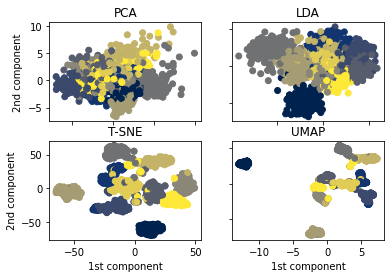

In [31]:
# Plot
y = y_digits 
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(d1_pca, d2_pca, c=y, cmap = 'cividis')
axs[0, 0].set_title('PCA')
axs[0, 1].scatter(d1_lda, d2_lda, c=y, cmap = 'cividis')
axs[0, 1].set_title('LDA')
axs[1, 0].scatter(d1_tsne, d2_tsne, c=y, cmap = 'cividis')
axs[1, 0].set_title('T-SNE')
axs[1, 1].scatter(d1_umap, d2_umap, c=y, cmap = 'cividis')
axs[1, 1].set_title('UMAP')

for ax in axs.flat:
    ax.set(xlabel='1st component', ylabel='2nd component')
for ax in axs.flat:
    ax.label_outer()

### Replicate figures on wine dataset

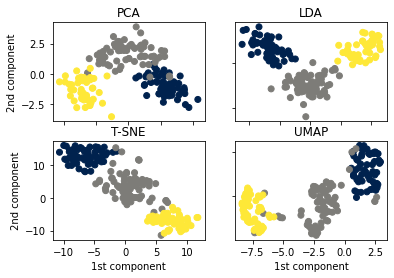

In [33]:
d1_pca, d2_pca = Dimesion_Reduction(reducer=PCA, X=X_wine, y=y_wine)
d1_lda, d2_lda = Dimesion_Reduction(reducer=LDA, X=X_wine, y=y_wine)
d1_tsne, d2_tsne = Dimesion_Reduction(reducer=TSNE, X=X_wine, y=y_wine)
d1_umap, d2_umap = Dimesion_Reduction(reducer=UMAP, X=X_wine, y=y_wine)

# Plot
y = y_wine 
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(d1_pca, d2_pca, c=y, cmap = 'cividis')
axs[0, 0].set_title('PCA')
axs[0, 1].scatter(d1_lda, d2_lda, c=y, cmap = 'cividis')
axs[0, 1].set_title('LDA')
axs[1, 0].scatter(d1_tsne, d2_tsne, c=y, cmap = 'cividis')
axs[1, 0].set_title('T-SNE')
axs[1, 1].scatter(d1_umap, d2_umap, c=y, cmap = 'cividis')
axs[1, 1].set_title('UMAP')

for ax in axs.flat:
    ax.set(xlabel='1st component', ylabel='2nd component')
for ax in axs.flat:
    ax.label_outer()

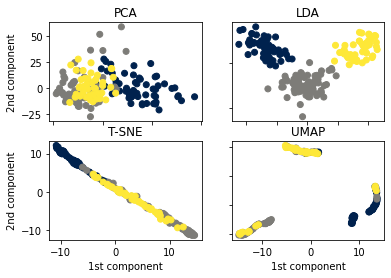

In [35]:
# Without standardizing the data
def Dimesion_Reduction1(reducer, X, y, *kwargs):
    #sc = StandardScaler()
    #X_std = sc.fit_transform(X)
    if reducer == LDA:
        umap = reducer().fit_transform(X, y) # As LDA is for supervised learning
    else:
        umap = reducer().fit_transform(X)
    d1, d2 = umap[:,0], umap[:,1]
    return d1, d2

# Collect the two components
d1_pca, d2_pca = Dimesion_Reduction1(reducer=PCA, X=X_wine, y=y_wine)
d1_lda, d2_lda = Dimesion_Reduction1(reducer=LDA, X=X_wine, y=y_wine)
d1_tsne, d2_tsne = Dimesion_Reduction1(reducer=TSNE, X=X_wine, y=y_wine)
d1_umap, d2_umap = Dimesion_Reduction1(reducer=UMAP, X=X_wine, y=y_wine)

# Plot
y = y_wine 
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(d1_pca, d2_pca, c=y, cmap = 'cividis')
axs[0, 0].set_title('PCA')
axs[0, 1].scatter(d1_lda, d2_lda, c=y, cmap = 'cividis')
axs[0, 1].set_title('LDA')
axs[1, 0].scatter(d1_tsne, d2_tsne, c=y, cmap = 'cividis')
axs[1, 0].set_title('T-SNE')
axs[1, 1].scatter(d1_umap, d2_umap, c=y, cmap = 'cividis')
axs[1, 1].set_title('UMAP')

for ax in axs.flat:
    ax.set(xlabel='1st component', ylabel='2nd component')
for ax in axs.flat:
    ax.label_outer()

2. Do it also for the wine dataset. What problems do you observe if you don't standardize the wine dataset? Why is this not a problem with the digits data?

We have that the dimension reductioners are very sensitive to the scaling of the features. Thus, if a dataset contains features that are of very different scales, then the scalers break down. We want to assign equal importance to all the features.

However, LDA is not sensitive to the scaling and this is why we do not see any difference in the outcomes for LDA.

As the features on the digit dataset are of the same scale, then this is an issue as this corresponds the features obtain equal importance in contrast to the wine dataset where there is relatively large variation in the scale of the features

3. Comment on the differences you observe as well as the applicability (and necessity thereof) of different methods for different data.

We notice that PCA performs the worst. If we compare PCa and LDA, the we have that PCA finds the orthogonal component axes of maximum variance where on the other hand LDA tries to find the feature subspace that optimizes separability. Thus, we notice the data on the x-axis of PCA is more spread out (which is the intention as the PCA 1 has contains the most variance of the data) where the data is less spread out in LDA. However, the clusters are more spread out.

The non-linear methods (no more linear projects) of T-SNE and UMAP do a very nice job, especially on the wine dataset.

## Problems from exercise set 4

In this problem we will try to implement and understand some of the ideas used in [Athey, Imbens (2015)](https://www.pnas.org/content/pnas/113/27/7353.full.pdf) to develop _Honest Inference_ in desicion tree models. The paper begins by covering honesty in a setting of population averages, and for estimating conditional means; so you will need to look towards the second half of the paper to get an impression of it's use for treatment-effect estimation.

> **Ex. 4.2.1:** What does it mean that a tree is _honest?_ In particular what are the implications in terms of 
> * The intuition for why honesty is required in order to get good local treatment effect estimates?
> * The practical implementation of the DT algorithm?

As stated in [Athey, Imbens (2015)](https://www.pnas.org/content/pnas/113/27/7353.full.pdf), then the "honest approach" to the estimation is based on splitting the train data into two parts; one sample is used to construct the partition and the other sample is used to estimate the treatment effects for each subpopulation. Thus, we do not use the same information for selecting the model structure as for estimation give the structure. This yields good local treatment effect estimates. The cost of this approach is that the sample size for estimation is reduced. The generalized forest supports this drawndown given the bootstrap as random forest works nice on small data samples for estimating trees.

Without the honest approach (one training sample for splitting and estimation), then the overall method is adaptive such that we may find spurious correlatons between the covariates to be taken into account as true "characteristics" of the data - this leads to low variance on the training data but large biases un the test data and other "new" random data. 

Overall, this has nice implications in terms of asymptotic theory and we can construct valid confidence intervals (this cannot be obtained without the honest approach given the adaptive nature of trees such that the biases do not disappear as the sample size grows).